[^ gor: Uvod](00_uvod.ipynb)

# Tangente in normale
**Tangenta** na graf funkcije $f(x)$ v točki $(x_0,f(x_0))$ je premica, ki se dotika grafa v točki $(x_0,f(x_0))$. **Normala** je premica, ki graf funkcije seka pravokotno.


## Trditve
Za tangento velja:

* Naklonski koefieceint je enak vrednosti odvoda v dotikališču
$$ k_T = f'(x_0) $$
* točka $(x_0,f(x_0))$ leži na tangenti
* enačba tangente je
$$y = f'(x_0)(x-x_0) + f(x_0)$$
 
Za normalo velja:

* Naklonski koefieceint je obraten in nasproten koeficijentu tangente
$$ k_N = -\frac{1}{k_T} = -\frac{1}{f'(x_0)} $$
* točka $(x_0,f(x_0))$ leži na normali
* enačba normale je
$$y = -\frac{1}{f'(x_0)}(x-x_0) + f(x_0)$$



## Primer
Dana je funkcija
$$y=\frac{1}{4}\left(x^3-2x^2-3x\right)$$
Poišči enačbo tangente v $x=1$ in enačbo normale v $x=2$. Poišči presečišče obeh premic.

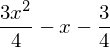

In [28]:
import sympy as sym
sym.init_printing() # lepši izpis formul
x = sym.Symbol('x')
f = lambda x: (x**3-2*x**2-3*x)/4
df = sym.diff(f(x),x) #simbolično odvajamo
dfun = sym.lambdify(x,df) # simbolični izraz spremenimo v Python funkcijo
df

In [29]:
y = sym.Symbol('y')
x0 = 1
tangenta = lambda x: dfun(x0)*(x-x0)+f(x0) # linearni približek funkcije f (tangenta)
sym.Eq(y,tangenta(x)) # enačba tangente

In [33]:
x1 = 2
normala = lambda x: -1/dfun(x1)*(x-x1)+f(x1) # normala
sym.Eq(y,normala(x))

In [38]:
# presečišče
xp = sym.solve(sym.Eq(normala(x),tangenta(x)),x)[0]
(xp,tangenta(xp))

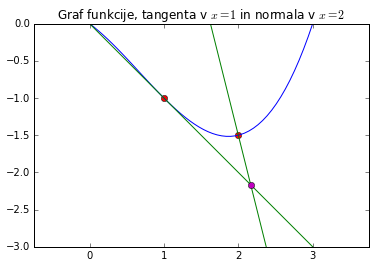

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,3)
plt.plot([x0,x1],[f(x0),f(x1)],'ro')
plt.plot(t,f(t),'b-')
plt.plot(t,tangenta(t),'g')
plt.plot(t,normala(t),'g')
plt.plot(xp,tangenta(xp),'mo')
plt.axis("equal")
plt.ylim(-3,0)
plt.title("Graf funkcije, tangenta v $x=1$ in normala v $x=2$")

[<< nazaj: funkcije](03a_funkcije.ipynb)

In [40]:
import disqus
%reload_ext disqus
%disqus matpy